In [1821]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pandasql as sql
import os
import math
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from functools import reduce
from scipy import stats

In [1906]:
df = pd.read_csv(r"C:\Users\NImi Jithin\Desktop\Studies\sem-3\research track\AggregateMessurement\final2.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Measured_order,Measurement_file,Month,Day,Year,Start_Time,End_Time,Duration,Duration_in_hours,Duration_in_minutes,Agg_Velocity,Agg_Temp,Predicted_Seg
0,0,0,0.0,m26.csv,August,Tuesday,2018,2018-08-07 16:42:03.752722,2018-08-07 16:42:34.252728,0 days 00:00:30.500006000,0.008472,0.508333,2.780367,34.5,6512.0
1,1,1,1.0,m26.csv,August,Tuesday,2018,2018-08-07 16:42:34.252728,2018-08-07 16:42:35.252723,0 days 00:00:00.999995000,0.000278,0.016667,10.794761,34.5,6513.0
2,2,2,2.0,m26.csv,August,Tuesday,2018,2018-08-07 16:42:35.252723,2018-08-07 16:42:35.752720,0 days 00:00:00.499997000,0.000139,0.008333,8.137900,34.5,6515.0
3,3,3,3.0,m26.csv,August,Tuesday,2018,2018-08-07 16:42:35.752720,2018-08-07 16:42:36.252717,0 days 00:00:00.499997000,0.000139,0.008333,6.038901,34.5,6521.0
4,4,4,4.0,m26.csv,August,Tuesday,2018,2018-08-07 16:42:36.252717,2018-08-07 16:42:37.752729,0 days 00:00:01.500012000,0.000417,0.025000,5.113185,34.5,6524.0


In [1907]:
# converting to to_datetime
df['End_Time'] = pd.to_datetime(df.End_Time)
df['Start_Time'] = pd.to_datetime(df.Start_Time)

In [1908]:
#df.dtypes

In [1909]:
df['Datetime'] = pd.to_datetime(df['Start_Time'])
df = df.set_index('Datetime')

In [1910]:
# testing a route which started at 13:00. So retrieving all the data between 12:00 - 15:00

# Case 1
df = df.between_time('12:00', '15:00')

#Case 2
df = df.between_time('12:00', '15:00')
q1 = """ select * from df where Month IN ('September')"""
df = sql.sqldf(q1, locals())

#Case 3
df = df.between_time('12:00', '15:00')
q1 = """ select * from df where Month IN ('August','September')"""
df = sql.sqldf(q1, locals())

# Case 4
#Same as above, but included the weather data for temperature as well 

In [1911]:
#tempdf.head()
len(df)

7185

In [1912]:
q1 = """ select distinct(Measurement_file),Year from df order by Year  """
messFiles = sql.sqldf(q1, locals())
messFiles

,Measurement_file,Year
0,m27.csv,2018
1,m30.csv,2018
2,m31.csv,2018
3,m35.csv,2018
4,m36.csv,2018
5,m37.csv,2018
6,m40.csv,2018


In [1913]:
messFiles = messFiles['Measurement_file'].values
messFiles

array(['m27.csv', 'm30.csv', 'm31.csv', 'm35.csv', 'm36.csv', 'm37.csv',
       'm40.csv'], dtype=object)

In [1923]:
weather_df = pd.read_csv(r"C:\Users\NImi Jithin\Downloads\weather_mean.csv", delimiter=';')
weather_df.head()

,id,date,wind_velocity,wind_direction,temperature,humidity,pressure,radiation,precipitation
0,288118,2016-01-01 00:00:00,1.3,209,1.4,100.0,1023.8,9,0.0
1,288119,2016-01-01 00:01:00,0.7,210,1.4,100.0,1023.8,9,0.0
2,288120,2016-01-01 00:02:00,1.1,209,1.4,100.0,1023.8,9,0.0
3,288121,2016-01-01 00:03:00,0.7,194,1.4,100.0,1023.8,9,0.0
4,288122,2016-01-01 00:04:00,1.0,217,1.4,100.0,1023.8,9,0.0


In [1924]:
#weather_df.dtypes
weather_df['date'] = pd.to_datetime(weather_df.date)

In [1447]:
weather_df.dtypes

id                         int64
date              datetime64[ns]
wind_velocity            float64
wind_direction             int64
temperature              float64
humidity                 float64
pressure                 float64
radiation                  int64
precipitation            float64
dtype: object

In [1925]:
weather_df['Datetime'] = pd.to_datetime(weather_df['date'])
weather_df = weather_df.set_index('Datetime')
weather_df['month'] = pd.to_datetime(weather_df['date']).dt.month
weather_df['year'] = pd.to_datetime(weather_df['date']).dt.year
weather_df.head()

,id,date,wind_velocity,wind_direction,temperature,humidity,pressure,radiation,precipitation,month,year
Datetime,,,,,,,,,,,
2016-01-01 00:00:00,288118,2016-01-01 00:00:00,1.3,209,1.4,100.0,1023.8,9,0.0,1,2016
2016-01-01 00:01:00,288119,2016-01-01 00:01:00,0.7,210,1.4,100.0,1023.8,9,0.0,1,2016
2016-01-01 00:02:00,288120,2016-01-01 00:02:00,1.1,209,1.4,100.0,1023.8,9,0.0,1,2016
2016-01-01 00:03:00,288121,2016-01-01 00:03:00,0.7,194,1.4,100.0,1023.8,9,0.0,1,2016
2016-01-01 00:04:00,288122,2016-01-01 00:04:00,1.0,217,1.4,100.0,1023.8,9,0.0,1,2016


In [1926]:
weather_df = weather_df.between_time('12:00', '15:00')

In [1469]:
q1 = """ select distinct(year) from weather_df """
rslt = sql.sqldf(q1, locals())
rslt

,year
0,2016
1,2017
2,2018
3,2019


In [1927]:
q1 = """ select * from weather_df where year = 2018 and month in ('9','8')  """
rslt = sql.sqldf(q1, locals())


In [1928]:
len(rslt)


11040

In [1929]:
total_len = len(messFiles)
#taking 50% of data for training and 50% for testing
#Calculating testing and trainin data index
train = math.ceil(0.2*total_len)
test =  train+1 #math.floor(0.2*total_len)
print(train,test,total_len)

2 3 7


In [1930]:
train = messFiles[0:train+1:1]
test = messFiles[test :total_len:1]
print(train,test)
print(len(train), len(test))

['m27.csv' 'm30.csv' 'm31.csv'] ['m35.csv' 'm36.csv' 'm37.csv' 'm40.csv']
3 4


In [1931]:
# dividing the data into test and  as training set
trainingDf = df[df['Measurement_file'].isin(train)]
testDf = df[df['Measurement_file'].isin(test)]
print(len(trainingDf),len(testDf))

3604 3581


In [1932]:
testRoute = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/AggregateMessurement/Agg/test.csv'
testRouteDF = pd.read_csv(testRoute)

In [1933]:
x = reduce(np.intersect1d, (testDf.Predicted_Seg, testRouteDF.Predicted_Seg, trainingDf.Predicted_Seg))

In [1934]:
len(x)

942

In [1935]:
trainingDf = trainingDf[trainingDf['Predicted_Seg'].isin(x)]
testDf = testDf[testDf['Predicted_Seg'].isin(x)]

In [1936]:
q1 = """ select count(distinct(Predicted_Seg)) from testDf """
rslt = sql.sqldf(q1, locals())
rslt

,count(distinct(Predicted_Seg))
0,942


In [1937]:
q1 = """ select distinct(Year) from testDf """
rslt = sql.sqldf(q1, locals())
rslt

,Year
0,2018


In [1938]:
testRouteDF.head()

,Predicted_Seg
0,6512
1,6513
2,6519
3,6521
4,6524


In [1939]:
#test_route_segIDs = """ select distinct(Predicted_Seg) from testRouteDF """
test_route_seg_ids = x

In [1940]:
len(test_route_seg_ids)

942

In [1941]:
avgsPredicted = """ select avg(Agg_Velocity) Agg_Velocity,avg(Agg_Temp) Agg_Temp,
                    avg(Duration_in_minutes) Duration_in_minutes, 
                    Predicted_Seg  from trainingDf  group by Predicted_Seg  """
avgsPredicted_df = sql.sqldf(avgsPredicted, locals())

In [1800]:
#avgsPredicted_df.tail()
#avgsPredicted_df.to_csv(r"C:\Users\NImi Jithin\Desktop\Studies\sem-3\research track\AggregateMessurement\predictedData.csv")

In [1942]:
avfTemptrain = trainingDf['Agg_Temp'].mean()
avfTemptest = testDf['Agg_Temp'].mean()
avfTempweatherData = weather_df['temperature'].mean()
avfTemptrain, avfTemptest, avfTempweatherData

(23.47624607225621, 17.266028494755002, 10.521707414729033)

In [1950]:
avgsPredicted_df['Agg_Temp'] = (avgsPredicted_df['Agg_Temp']+avfTempweatherData)/2

In [1943]:
avgs_actualDf = """ select avg(Agg_Velocity) Agg_Velocity,avg(Agg_Temp) Agg_Temp,
                    avg(Duration_in_minutes) Duration_in_minutes, Predicted_Seg
                    from testDf group by Predicted_Seg  """
avg_actualDf = sql.sqldf(avgs_actualDf, locals())

In [1945]:
#avg_df.head()
len(avg_actualDf)

942

In [1946]:
#avg_testDf.head()
len(avgsPredicted_df)

942

In [1964]:
saveDirectory = 'C:/Users/NImi Jithin/Desktop/Studies/sem-3/research track/images/Senario/Case-3/'

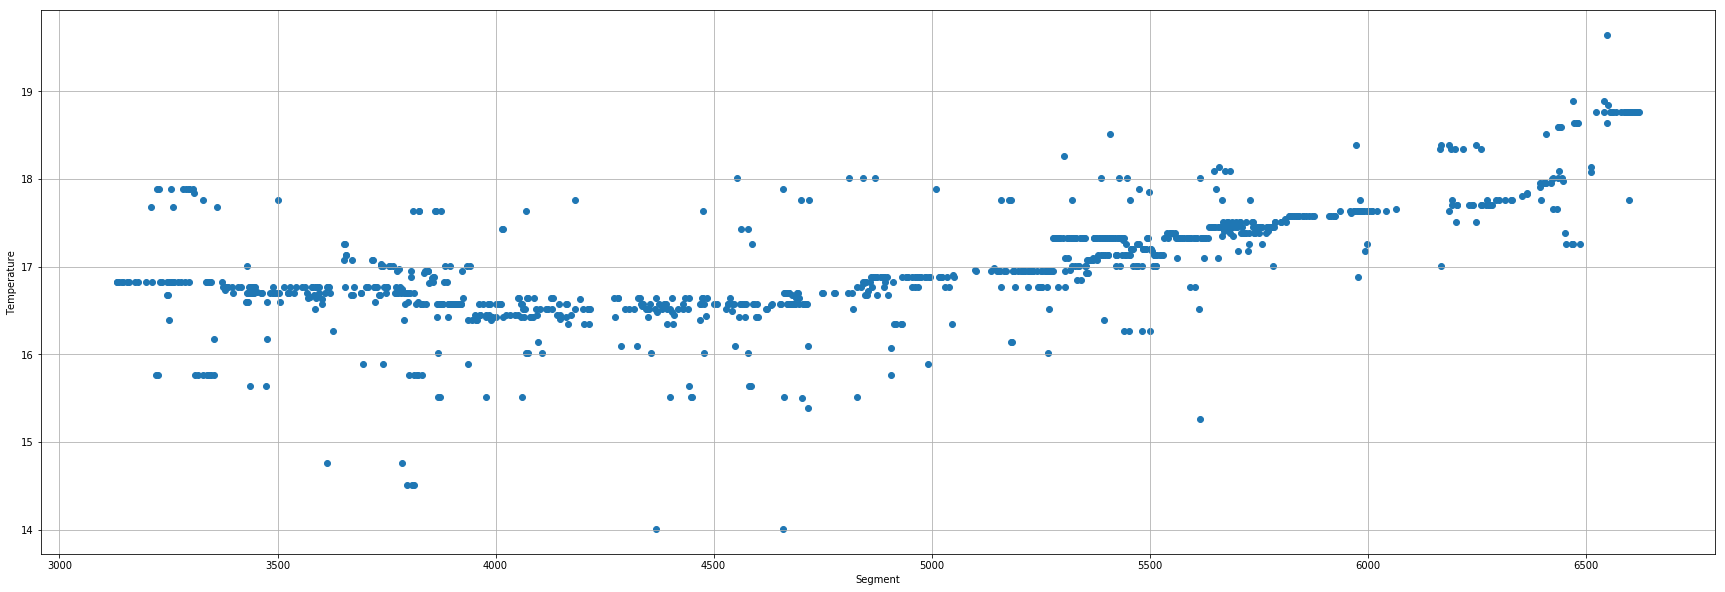

In [1954]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(which='both')

plt.scatter(avgsPredicted_df.Predicted_Seg, avgsPredicted_df.Agg_Temp)
plt.rcParams["figure.figsize"] = (10,5)
plt.xlabel('Segment')
plt.ylabel('Temperature')
fig.savefig(saveDirectory+'TempScatteringofPredictedData.png',bbox_inches='tight')

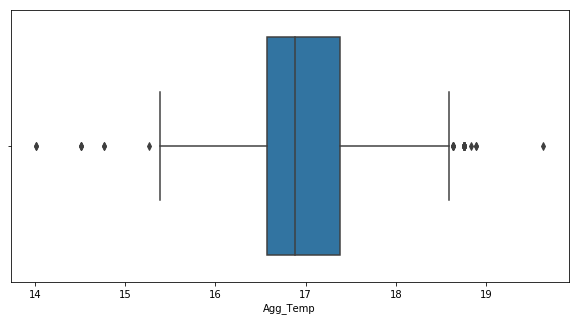

In [1958]:
sns.boxplot(x=avgsPredicted_df['Agg_Temp'])
fig.savefig(saveDirectory+'TempScatteringofPredictedData.png',bbox_inches='tight')

In [1603]:
z = np.abs(stats.zscore(avgsPredicted_df.Agg_Temp))
#print(z)

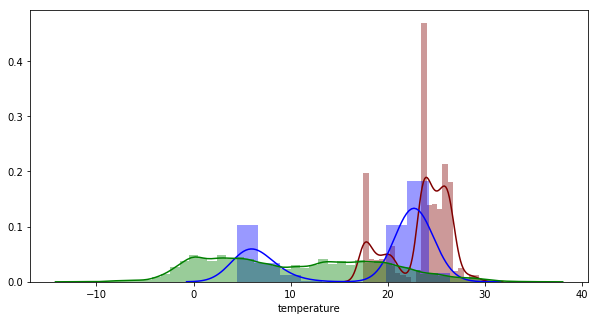

In [1960]:
plt.subplot(1, 1, 1)#sns.distplot(avgsPredicted_df['Agg_Temp'], color="maroon")
sns.distplot(trainingDf['Agg_Temp'], color="maroon")
#plt.subplot(1, 3, 2)
sns.distplot(testDf['Agg_Temp'], color="blue")
#plt.subplot(1, 3, 3)
sns.distplot(weather_df['temperature'], color="green")

In [1705]:
avfTemp_stdDev = avgsPredicted_df['Agg_Temp'].std()
avfTemp_stdDev

1.3352129556897818

In [1706]:
avgsPredicted_df['TempZscore'] = np.abs(stats.zscore(avgsPredicted_df.Agg_Temp))

Text(0, 0.5, 'frequency')

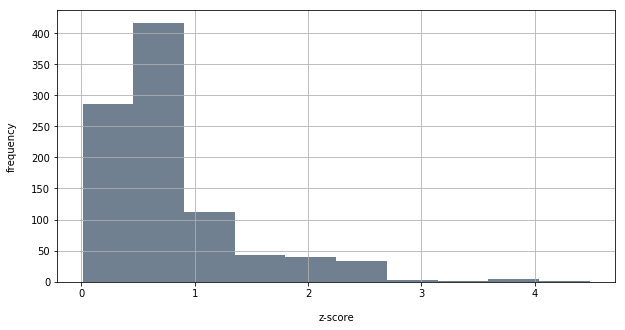

In [1707]:
avgsPredicted_df['TempZscore'].hist(color='slategray')
plt.xlabel("z-score", labelpad=14)
plt.ylabel("frequency", labelpad=14)

In [1708]:
avgsPredicted = """ select *  from avgsPredicted_df  where TempZscore<3 """
avgsPredicted_df = sql.sqldf(avgsPredicted, locals())
len(avgsPredicted_df)

934

Text(0, 0.5, 'frequency')

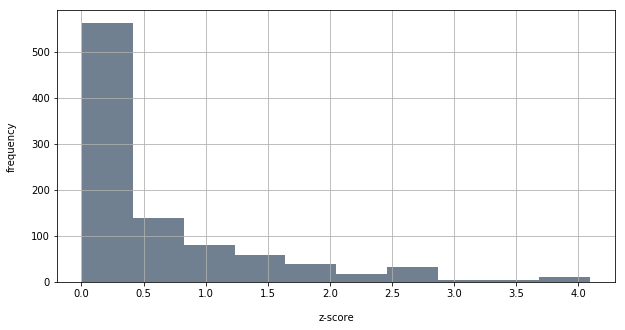

In [1709]:
avfTemp = avg_actualDf['Agg_Temp'].mean()
avfTemp
avfTemp_stdDev = avg_actualDf['Agg_Temp'].std()
avfTemp_stdDev
avg_actualDf['TempZscore'] = np.abs(stats.zscore(avg_actualDf.Agg_Temp))
avg_actualDf['TempZscore'].hist(color='slategray',bins=10)
plt.xlabel("z-score", labelpad=14)
plt.ylabel("frequency", labelpad=14)

In [1710]:
avgactualDf = """ select *  from avg_actualDf  where TempZscore<3 """
avg_actualDf = sql.sqldf(avgactualDf, locals())
len(avg_actualDf)


924

In [1711]:
x = reduce(np.intersect1d, (avg_actualDf.Predicted_Seg, testRouteDF.Predicted_Seg, avgsPredicted_df.Predicted_Seg))

In [1712]:
len(x)

917

In [ ]:
avgactualDf = """ select *  from avg_actualDf  where TempZscore<3 """
avg_actualDf = sql.sqldf(avgactualDf, locals())
len(avg_actualDf)

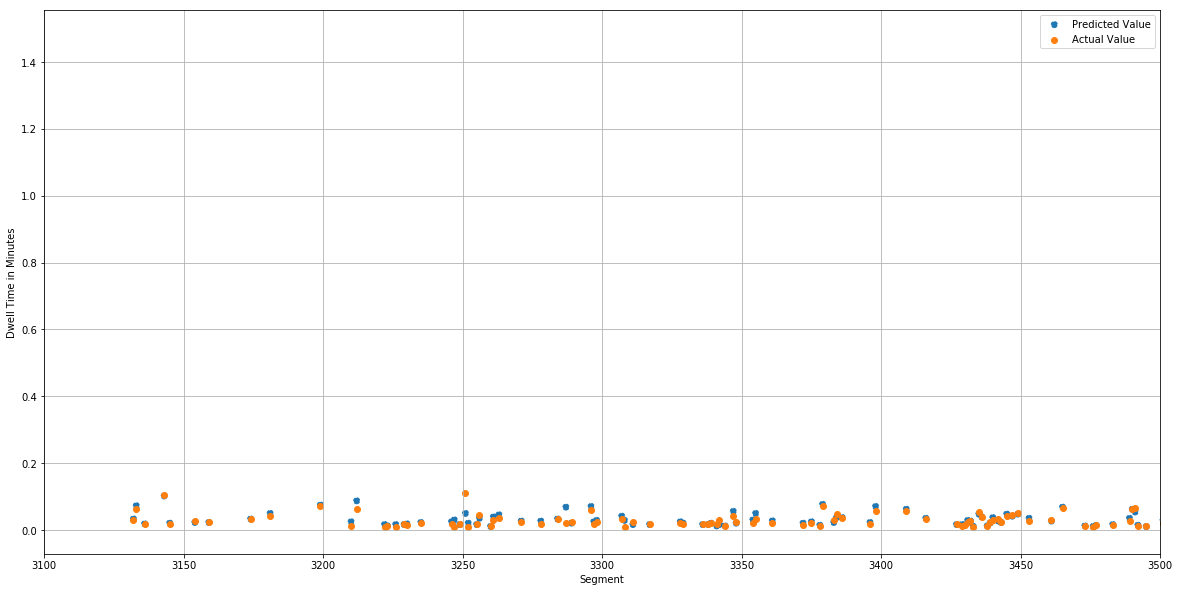

In [1965]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)




ax.grid(which='both')

#plt.hist(avg_df.Predicted_Seg, avg_df.Duration_in_minutes)
plt.scatter(avgsPredicted_df.Predicted_Seg, avgsPredicted_df.Duration_in_minutes,label='Predicted Value',linestyle='dashed')
plt.scatter(avg_actualDf.Predicted_Seg, avg_actualDf.Duration_in_minutes, label='Actual Value')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (20,10)

#plt.grid(axis='both')
plt.xlabel('Segment')
plt.ylabel('Dwell Time in Minutes')

plt.xlim(3100, 3500)
fig.savefig(saveDirectory+'dwelltime.png',bbox_inches='tight')

In [1966]:
mean_squared_error(avg_actualDf.Duration_in_minutes, avgsPredicted_df.Duration_in_minutes)

0.0018004302275190524

In [1967]:
mean_absolute_error(avg_actualDf.Duration_in_minutes, avgsPredicted_df.Duration_in_minutes)

0.0064487632392663365

In [1364]:
#df.iloc[1]['Start_Time'].time()
#tempDf['Start'] = tempDf['Start'].apply(lambda x: datetime.strftime(x, '%H'))
#print(df['Start_Time'].dt.time())
#print(tempdf['Start_Time'].dt.time)
##to get hour and minute
#print(df['date_col'].dt.strftime('%H:%M'))

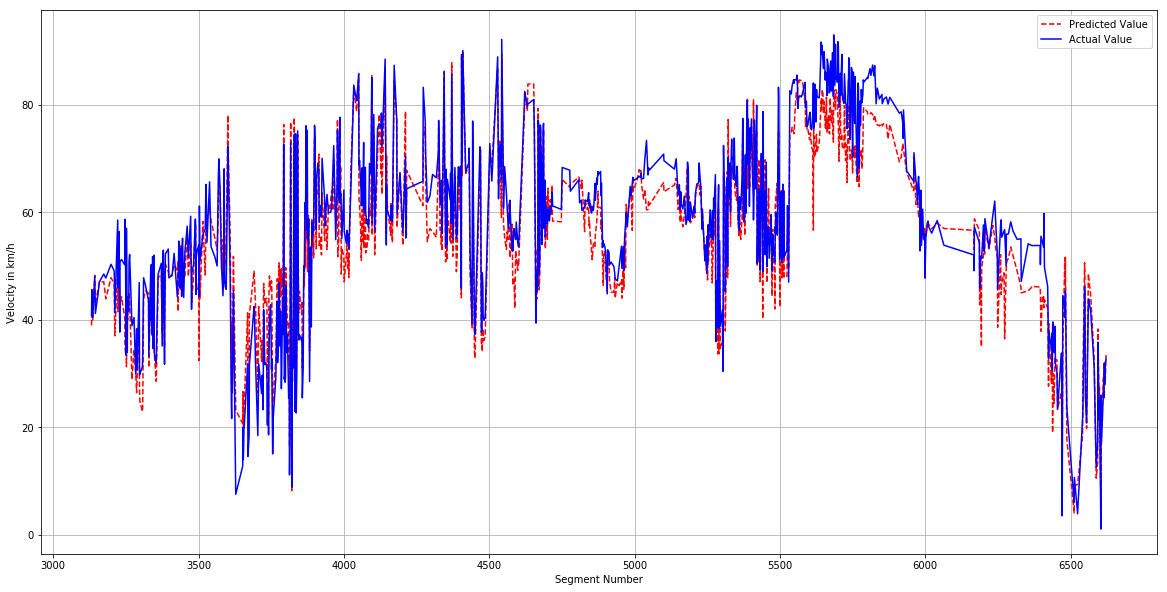

In [1968]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


ax.grid(which='both')

#plt.hist(avg_df.Predicted_Seg, avg_df.Duration_in_minutes)
plt.plot(avgsPredicted_df.Predicted_Seg, avgsPredicted_df.Agg_Velocity,'r', label='Predicted Value',linestyle='dashed')
plt.plot(avg_actualDf.Predicted_Seg, avg_actualDf.Agg_Velocity, 'b', label='Actual Value')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (20,10)

#plt.grid(axis='both')
plt.xlabel('Segment Number')
plt.ylabel('Velocity in km/h')
#plt.ylim(0, 0.150)
#plt.xlim(3110, 4250)
fig.savefig(saveDirectory+'velocity1.png',bbox_inches='tight')

In [1969]:
math.sqrt(mean_squared_error(avg_actualDf.Agg_Velocity, avgsPredicted_df.Agg_Velocity))

6.114336462241256

In [1970]:
mean_absolute_error(avg_actualDf.Agg_Velocity, avgsPredicted_df.Agg_Velocity)

4.770972329309008

In [1574]:
avgsPredicted_df.head()

,Predicted_Seg
0,3132.0
1,3133.0
2,3136.0
3,3143.0
4,3145.0


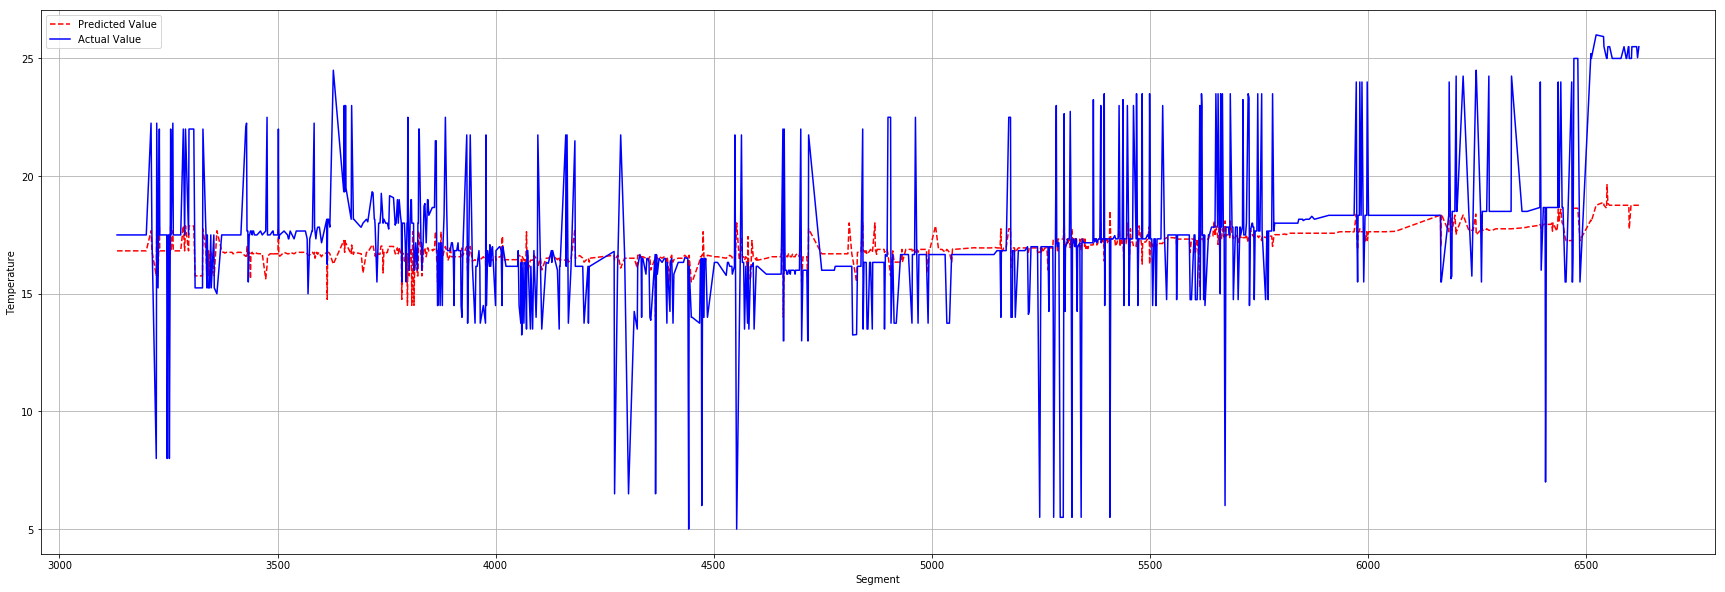

In [1951]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks , minor ticks 
ax.grid(which='both')
#plt.hist(avg_df.Predicted_Seg, avg_df.Duration_in_minutes)
plt.plot(avgsPredicted_df.Predicted_Seg, avgsPredicted_df.Agg_Temp,label='Predicted Value',linestyle='dashed',color='red')
plt.plot(avg_actualDf.Predicted_Seg, avg_actualDf.Agg_Temp,label='Actual Value', color='blue')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (30,10)

#plt.grid(axis='both')
plt.xlabel('Segment')
plt.ylabel('Temperature')
#plt.xlim(6480, 6485)
#plt.xlim(3500, 4000)
fig.savefig(saveDirectory+'TempWithWeatherData.png',bbox_inches='tight')

In [1952]:
math.sqrt(mean_squared_error(avg_actualDf.Agg_Temp, avgsPredicted_df.Agg_Temp))

2.8114771218450674

In [1953]:
mean_absolute_error(avg_actualDf.Agg_Temp, avgsPredicted_df.Agg_Temp)

1.6638432964526928